In [1]:
import requests
import re
from os.path import exists
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


urls = {
    "Nike Air Force 1 '07": "https://www.nike.com/t/air-force-1-07-mens-shoes-5QFp5Z/CW2288-001",
}

date = datetime.today().strftime('%Y-%m-%d')

# File where prices will be saved
save_file = "nike_historical_prices.txt"

In [5]:
# Collect daily price data

for item_name in urls.keys():
    
    # Retrieve URL from dictionary
    url = urls.get(item_name)
    
    # Get HTML from URL
    html_doc = requests.get(url).text
    
    # Search the HTML page for the price using regex
    result = re.search('price:amount" content="[0-9]+"', html_doc).group(0)
    
    # Trim the regex result to just the price and cast to float
    price = float(result[23:-1])

    print(item_name + ": " + str(price))
    
    # Check if file exists, open, and read contents
    if exists(save_file):
        f = open(save_file, "r+")
        historical_prices = dict(eval(f.read()))
    else:
        f = open(save_file, "w+")
        historical_prices = {}

    # Data is stored as a dictionary of dictionaries in the form of item_name: date: price
    price_data = historical_prices.get(item_name, {})
    price_data[date] = price
    historical_prices[item_name] = price_data

    f.seek(0)
    f.write(str(historical_prices))
    f.close()

Nike Air Force 1 '07: 90.0


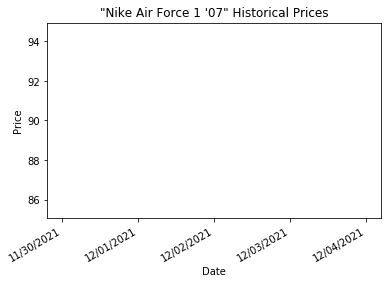

In [4]:
# Display historical price data on graph

for item_name in urls.keys():
    
    # Chart historical prices
    price_tuples = list(historical_prices[item_name].items())

    # Convert datetime objects to Matplotlib dates
    # More info - https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.date2num
    price_tuples = [(mdates.datestr2num(x[0]), x[1]) for x in price_tuples]

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(*zip(*price_tuples))
    plt.title("\"" + item_name + "\" Historical Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.gcf().autofmt_xdate()
    plt.show()